In [1]:
import sys
sys.path.append('../../../')

In [2]:
import pandas as pd
import numpy as np
import prince
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../../data_lake/output_prod/train.pkl")
val = pd.read_pickle("../../../data_lake/output_prod/val.pkl")

# 2.0 Data preparation

In [4]:
df = df.drop(columns=['dist2','customer_id','TransactionID'])
val = val.drop(columns=['dist2','customer_id','TransactionID'])

In [5]:
df = df.rename(columns={'id_31':'browser'})
val = val.rename(columns={'id_31':'browser'})

In [6]:
df['P_emaildomain'] = df['P_emaildomain'].mask(df['P_emaildomain']=='gmail','gmail.com')
val['P_emaildomain'] = val['P_emaildomain'].mask(val['P_emaildomain']=='gmail','gmail.com')

In [7]:
df['R_emaildomain'] = df['R_emaildomain'].mask(df['R_emaildomain']=='gmail','gmail.com')
val['R_emaildomain'] = val['R_emaildomain'].mask(val['R_emaildomain']=='gmail','gmail.com')

In [8]:
df['id_30'] = df['id_30'].replace(" ","_",regex=True)
df['id_30'] = df['id_30'].str.replace(".","_",regex=False)

In [9]:
val['id_30'] = val['id_30'].replace(" ","_",regex=True)
val['id_30'] = val['id_30'].str.replace(".","_",regex=False)

In [10]:
df['browser'] = df['browser'].mask(df['browser'].str.contains('SM') | df['browser'].str.contains('ZTE'),'other')
val['browser'] = val['browser'].mask(val['browser'].str.contains('SM') | val['browser'].str.contains('ZTE'),'other')

In [11]:
df['browser'] = df['browser'].astype(str)
val['browser'] = val['browser'].astype(str)

# 3.0 Features creation

## 3.1 Browser specification

In [12]:
df['browser_enc'] = 'other'
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('ie'),'ie')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('safari'),'safari')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('edge'),'edge')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('firefox'),'firefox')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('android'),'android')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('Android'),'android')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('chrome'),'chrome')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('opera'),'opera')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('google'),'chrome')
df['browser_enc'] = df['browser_enc'].mask(df['browser'].str.contains('samsung'),'android')

In [13]:
val['browser_enc'] = 'other'
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('ie'),'ie')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('safari'),'safari')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('edge'),'edge')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('firefox'),'firefox')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('android'),'android')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('Android'),'android')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('chrome'),'chrome')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('opera'),'opera')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('google'),'chrome')
val['browser_enc'] = val['browser_enc'].mask(val['browser'].str.contains('samsung'),'android')

## 3.2 Device type

In [14]:
df['DeviceType'] = df['DeviceType'].mask(df['browser']== 'ie 11.0 for tablet','tablet')
val['DeviceType'] = val['DeviceType'].mask(val['browser']== 'ie 11.0 for tablet','tablet')

In [15]:
df = df.drop(columns='browser')
val = val.drop(columns='browser')

In [16]:
df['device_info'] = df['DeviceInfo'].replace("-","_",regex=True)
df['device_info2'] = df['device_info'].replace(" ","_",regex=True)
df['device_info'] = df['DeviceInfo'].replace("-","_",regex=True)
df['device_info2'] = df['device_info'].replace(" ","_",regex=True)
df['device_info3'] = df['device_info2'].str.split("_").str[0]
df['device_info3'] = df['device_info3'].str.lower()

In [17]:
val['device_info'] = val['DeviceInfo'].replace("-","_",regex=True)
val['device_info2'] = val['device_info'].replace(" ","_",regex=True)
val['device_info'] = val['DeviceInfo'].replace("-","_",regex=True)
val['device_info2'] = val['device_info'].replace(" ","_",regex=True)
val['device_info3'] = val['device_info2'].str.split("_").str[0]
val['device_info3'] = val['device_info3'].str.lower()

In [18]:
df['device_info_v4'] = 'other'
df['device_info_v4'] = df['device_info_v4'].mask(((df['device_info3']=='windows') | (df['device_info3']=='microsoft') | (df['device_info3']=='trident/7.0')),'windows')
df['device_info_v4'] = df['device_info_v4'].mask(((df['device_info3']=='ios') | (df['device_info3']=='iphone')),'ios')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='macos','ios')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='blade','blade')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='lenovo','lenovo')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='redmi','redmi')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='pixel','pixel')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='android','android')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='macos','ios')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='alcatel','alcatel')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='nokia','nokia')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='asus','asus')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='oneplus','oneplus')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='zte','zte')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='macos','ios')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='hisense','hisense')
df['device_info_v4'] = df['device_info_v4'].mask(df['device_info3']=='linux','linux')
df['device_info_v4'] = df['device_info_v4'].mask((df['device_info3'].str.contains("lg") | (df['device_info3'].str.contains("nexus"))),'lg')
df['device_info_v4'] = df['device_info_v4'].mask(((df['device_info3'].str.contains("huawei")) | (df['device_info3'].str.contains("hi6210sft"))),'huawei')
df['device_info_v4'] = df['device_info_v4'].mask(((df['device_info3']=='motog3') |(df['device_info3']=='moto')),'moto')
df['device_info_v4'] = df['device_info_v4'].mask(((df['device_info3']=='sm') |(df['device_info3']=='samsung')),'samsung')

In [19]:
val['device_info_v4'] = 'other'
val['device_info_v4'] = val['device_info_v4'].mask(((val['device_info3']=='windows') | (val['device_info3']=='microsoft') | (val['device_info3']=='trident/7.0')),'windows')
val['device_info_v4'] = val['device_info_v4'].mask(((val['device_info3']=='ios') | (val['device_info3']=='iphone')),'ios')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='macos','ios')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='blade','blade')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='lenovo','lenovo')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='redmi','redmi')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='pixel','pixel')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='android','android')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='macos','ios')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='alcatel','alcatel')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='nokia','nokia')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='asus','asus')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='oneplus','oneplus')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='zte','zte')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='macos','ios')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='hisense','hisense')
val['device_info_v4'] = val['device_info_v4'].mask(val['device_info3']=='linux','linux')
val['device_info_v4'] = val['device_info_v4'].mask((val['device_info3'].str.contains("lg") | (val['device_info3'].str.contains("nexus"))),'lg')
val['device_info_v4'] = val['device_info_v4'].mask(((val['device_info3'].str.contains("huawei")) | (val['device_info3'].str.contains("hi6210sft"))),'huawei')
val['device_info_v4'] = val['device_info_v4'].mask(((val['device_info3']=='motog3') |(val['device_info3']=='moto')),'moto')
val['device_info_v4'] = val['device_info_v4'].mask(((val['device_info3']=='sm') |(val['device_info3']=='samsung')),'samsung')

In [20]:
df = df.drop(columns=['device_info','device_info2','device_info3','DeviceInfo'])
val = val.drop(columns=['device_info','device_info2','device_info3','DeviceInfo'])

# 4.0 EDA

In [21]:
df.sample(2)

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M4,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,num_accounts_related_to_user,num_days_previous_transaction,num_transaction_per_time,multi_transaction_per_time,browser_enc,device_info_v4
95383,0,100.0,S,8830,250.0,150.0,visa,226.0,credit,441.0,87.0,NaN,icloud.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows_7,24.0,1280x1024,match_status:2,T,F,T,T,desktop,23.0,393.833344,1,0,chrome,windows
36467,0,100.0,H,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,yahoo.com,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows_7,24.0,1920x1080,match_status:2,T,F,T,T,desktop,1.0,0.875000,1,0,firefox,other


## 4.1 Numerical features

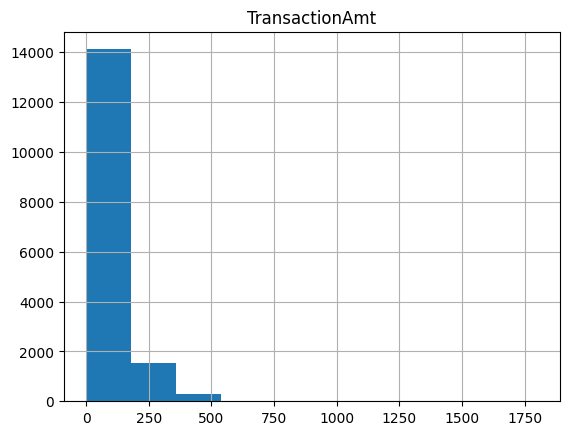

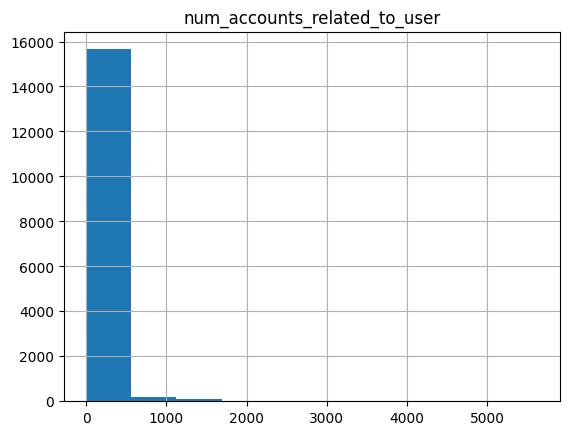

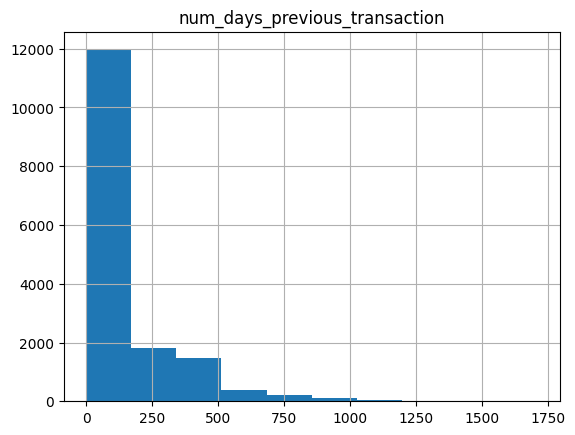

In [22]:
for i in df:
    if df[i].dtypes == 'float64':
        plt.figure(i)
        plt.title(i)
        df[i].hist()

## 4.2 Categorical features

In [23]:
cat = df.select_dtypes(exclude='float64')

In [24]:
cat.shape

(16054, 35)

In [25]:
# cat = cat.dropna(thresh=int(0.35*df.shape[0]),axis=1)

In [26]:
cat = cat[['isFraud','ProductCD','DeviceType','browser_enc']]

In [27]:
cat.sample(1)

,isFraud,ProductCD,DeviceType,browser_enc
17918,0,H,mobile,chrome


In [28]:
cat.shape

(16054, 4)

In [29]:
mca = mlu.compute_mca(prince.MCA,cat,3,5,True,True,'auto',2)

MCA explained variance:  [0.043244056758617214, 0.03657382831172596, 0.022505923790252808]


/anaconda/envs/dev/lib/python3.8/site-packages/prince/mca.py:24: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [30]:
mlu.plot_coordinates_plotly2d(model=mca,X=cat,show_column_points=True)

/anaconda/envs/dev/lib/python3.8/site-packages/prince/mca.py:43: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [31]:
mlu.plot_coordinates_plotly3d(model=mca,X=cat,show_column_points=True)

/anaconda/envs/dev/lib/python3.8/site-packages/prince/mca.py:43: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [32]:
df.sample(2)

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M4,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,num_accounts_related_to_user,num_days_previous_transaction,num_transaction_per_time,multi_transaction_per_time,browser_enc,device_info_v4
8348,1,450.000,H,4151,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows_10,24.0,1366x768,match_status:2,T,F,T,T,desktop,3.0,125.75,1,0,chrome,windows
101910,0,13.413,C,5812,408.0,185.0,mastercard,224.0,debit,NaN,NaN,hotmail.com,hotmail.com,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,NaN,NaN,NaN,F,F,T,F,desktop,14.0,127.00,1,0,chrome,moto


# 5.0 Output

In [33]:
df.to_pickle('../../../data_lake/output_prod/train_eng.pkl')
val.to_pickle('../../../data_lake/output_prod/val_eng.pkl')